# Corpora and Dictionaries

Topics in Text Data Methods<br>
Aapo Stenhammar, Uni Bonn<br>
Adapted from Elliot Ash and Benjamin Arold


In [2]:
# set random seed
import numpy as np
np.random.seed(4)

# Web Scraping

There are several ways to obtain data from the internet. Below are the links to tutorial for these methods:

1. Scraping with [selenium](https://selenium-python.readthedocs.io/) (an example [here](https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a): useful if the webpage contains JS scripts)
2. Retrieving raw html with [beautifulsoup](https://beautiful-soup-4.readthedocs.io/en/latest/)
3. Quering [REST Api](https://restfulapi.net/) (a nice example [here](https://betterprogramming.pub/extracting-rest-api-data-using-python-with-an-example-e800b03bb62e))

## Downloading URL's

In [3]:
import urllib.request as urllib # Python's module for accessing web pages
url = 'https://www.gutenberg.org/cache/epub/1513/pg1513-images.html' # URL for court case
page = urllib.urlopen(url) # open the web page

html = page.read() # read web page contents as a string
print(html[:400])  # print first 400 characters
print()
print(html[-400:]) # print last 400 characters
print()
print(len(html),'characters in string.')   # print length of string

b'<!DOCTYPE html>\r\n<html lang="en"><head>\r\n<meta charset="utf-8"><style>\r\n#pg-header div, #pg-footer div {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    margin-left: 2em;\r\n}\r\n#pg-footer div.agate {\r\n    font-size: 90%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-footer li {\r\n    all: initial;\r\n    display: block;\r\n    marg'

b's the main PG search\r\nfacility: <a href="https://www.gutenberg.org">www.gutenberg.org</a>.\r\n</div><div>\r\nThis website includes information about Project Gutenberg\xe2\x84\xa2,\r\nincluding how to make donations to the Project Gutenberg Literary\r\nArchive Foundation, how to help produce our new eBooks, and how to\r\nsubscribe to our email newsletter to hear about new eBooks.\r\n</div>\r\n\r\n</section></body></html>\r\n'

222576 characters in string.


## Parsing HTML

In [8]:
# Parse raw HTML
# !pip install beautifulsoup4
from bs4 import BeautifulSoup # package for parsing HTML
soup = BeautifulSoup(html, "html.parser") # parse html of web page
print(soup.title) # example usage: print title item

<title>Romeo and Juliet | Project Gutenberg</title>


In [10]:
# extract text
text = soup.get_text() # get text (remove HTML markup)
lines = text.splitlines() # split string into separate lines
print(len(lines)) # print number of 
print(lines[:10]) # print first 10 lines

6387
['', '', 'Romeo and Juliet | Project Gutenberg', '', '', '', '', '', '', '']


In [11]:
lines = [line for line in lines if line != ''] # drop empty lines
print(len(lines)) # print number of lines

4503


In [12]:
# print first 20 lines line by line:
for line in lines[:20]: print(line)

Romeo and Juliet | Project Gutenberg
The Project Gutenberg eBook of Romeo and Juliet
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.
Title: Romeo and Juliet
Author: William Shakespeare
Release date: November 1, 1998 [eBook #1513]
                Most recently updated: September 18, 2025
Language: English
Credits: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers
*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***
THE TRAGEDY OF ROMEO AND JULIET
by William Shakespeare
Contents
 THE PROLOGUE.


## Removing unicode characters

In [13]:
#!pip install unidecode
from unidecode import unidecode # package for removing unicode
uncode_str = 'Visualizations\xa0'
fixed = unidecode(uncode_str) # example usage
print([uncode_str],[fixed]) # print cleaned string (replaced with a space)

['Visualizations\xa0'] ['Visualizations ']


# Loading and Inspecting Data with Pandas

These notebooks are more about methods than answering a specific research questions. However, while going through them, it is useful to keep in mind a potential research questions with economic relevance. We will be working with court cases and have the text of the opinion written by the judge,its affiliation, as well as some information about type of opinion, other judges on the panel and the number of cites for each opinion

**Given these data, what could be interesting to investigate?**

When dealing with inspecting or cleaning data in python pandas is your best friend and [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)'s a useful cheat sheet

In [14]:
#import warnings; warnings.simplefilter('ignore')
#!pip install pandas
import pandas as pd
df = pd.read_csv('sc_cases.zip',compression='gzip')

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   case_name       786 non-null    object 
 1   opinion_type    820 non-null    object 
 2   date_standard   820 non-null    object 
 3   authorship      820 non-null    object 
 4   x_republican    803 non-null    float64
 5   maj_judges      786 non-null    object 
 6   dissent_judges  786 non-null    object 
 7   topic_id        786 non-null    float64
 8   cite_count      812 non-null    float64
 9   opinion_text    820 non-null    object 
dtypes: float64(3), object(7)
memory usage: 64.2+ KB


In [17]:
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
3,NaN,majority,2005-04-15,KENNEDY,1.0,NaN,NaN,NaN,6.0,"Justice Kennedy, Circuit Justice. \n\n This is..."
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...


In [16]:
# drop missing
df = df.dropna()
df.head()

,case_name,opinion_type,date_standard,authorship,x_republican,maj_judges,dissent_judges,topic_id,cite_count,opinion_text
0,ERICK CORNELL CLAY v. UNITED STATES,majority,2003-03-04,GINSBURG,0.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,2926.0,JUSTICE GINSBURG delivered the opinion of the ...
1,"HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...",majority,2003-06-09,STEVENS,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['THOMAS, CLARENCE']",8.0,117.0,Justice Stevens delivered the opinion of the C...
2,"CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN",majority,2005-03-30,O'CONNOR,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],1.0,23364.0,Justice O'Connor delivered the opinion of the ...
4,STATE OF ALASKA v. UNITED STATES OF AMERICA,majority,2005-06-06,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...","['REHNQUIST, WILLIAM', 'SCALIA, ANTONIN', 'THO...",10.0,84.0,Justice Kennedy delivered the opinion of the C...
5,"REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...",majority,2005-06-13,KENNEDY,1.0,"['BREYER, STEPHEN', 'GINSBURG, RUTH', 'KENNEDY...",[],4.0,4230.0,Justice Kennedy delivered the opinion of the C...


In [17]:
# Number of label categories (e.g. judges)
df['authorship'].describe()

count        781
unique        27
top       SCALIA
freq          86
Name: authorship, dtype: object

In [19]:
# tabulations of label categories 
df['authorship'].value_counts()

authorship
SCALIA                                           86
GINSBURG                                         85
KENNEDY                                          83
THOMAS                                           79
STEVENS                                          78
BREYER                                           76
SOUTER                                           73
REHNQUIST                                        53
O'CONNOR                                         52
ROBERTS                                          31
ALITO                                            23
Breyer                                           13
Roberts                                          12
Kennedy                                           9
Alito                                             9
Scalia                                            8
Thomas                                            8
Ginsburg                                          8
Stevens                                           7
S

In [18]:
df['authorship'] = df['authorship'].str.upper()

In [19]:
df['authorship'].value_counts()

authorship
SCALIA                                           94
GINSBURG                                         89
THOMAS                                           87
KENNEDY                                          86
BREYER                                           85
STEVENS                                          79
SOUTER                                           77
O'CONNOR                                         52
REHNQUIST                                        49
ROBERTS                                          38
ALITO                                            32
SOTOMAYOR                                         7
STEVENS  AND  O'CONNOR ;  REHNQUIST ;  BREYER     2
STEVENS  (IN PART),  BREYER  (IN PART)            1
JUSTICE  ALITO                                    1
BREYER ;                                          1
ROBERTS ,  SCALIA ,  THOMAS ,  ALITO              1
Name: count, dtype: int64

In [20]:
# keep all judges through ALITO
keep_judges = df['authorship'].value_counts().index[:11]
print(keep_judges)

Index(['SCALIA', 'GINSBURG', 'THOMAS', 'KENNEDY', 'BREYER', 'STEVENS',
       'SOUTER', 'O'CONNOR', 'REHNQUIST', 'ROBERTS', 'ALITO'],
      dtype='object', name='authorship')


In [21]:
df = df[df['authorship'].isin(keep_judges)]
df['authorship'].value_counts()

authorship
SCALIA       94
GINSBURG     89
THOMAS       87
KENNEDY      86
BREYER       85
STEVENS      79
SOUTER       77
O'CONNOR     52
REHNQUIST    49
ROBERTS      38
ALITO        32
Name: count, dtype: int64

In [22]:
df.date_standard

0      2003-03-04
1      2003-06-09
2      2005-03-30
4      2005-06-06
5      2005-06-13
          ...    
815    2001-04-18
816    2001-04-24
817    2001-04-24
818    2001-05-14
819    2001-05-14
Name: date_standard, Length: 768, dtype: object

In [23]:
df['date_standard'] = pd.to_datetime(df['date_standard'])
df['date_standard']

0     2003-03-04
1     2003-06-09
2     2005-03-30
4     2005-06-06
5     2005-06-13
         ...    
815   2001-04-18
816   2001-04-24
817   2001-04-24
818   2001-05-14
819   2001-05-14
Name: date_standard, Length: 768, dtype: datetime64[ns]

In [24]:
df['year'] = df['date_standard'].dt.year
df['year'].value_counts()

year
2001    77
2000    76
2009    74
2002    74
2004    73
2003    70
2005    70
2007    65
2010    64
2006    63
2008    62
Name: count, dtype: int64

<Axes: >

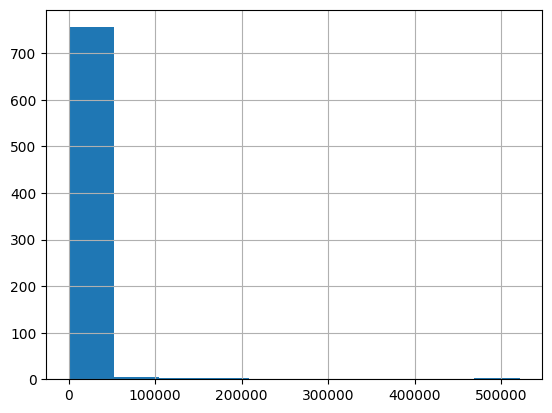

In [25]:
df['cite_count'].hist()

<Axes: >

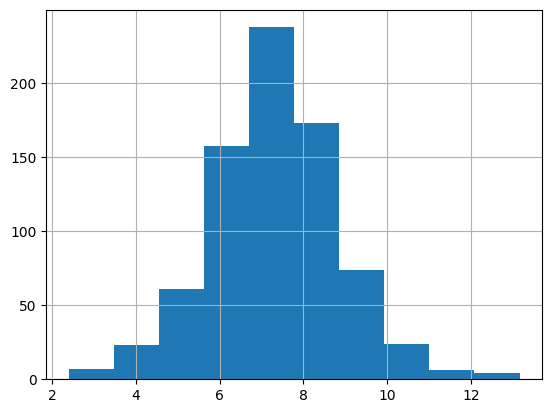

In [26]:
import numpy as np
df['log_cite_count'] = np.log(df['cite_count'])
df['log_cite_count'].hist()

In [27]:
log_cite_count = np.log(df['cite_count'].dropna())
log_cite_count.reset_index(drop=True)


0       7.981392
1       4.762174
2      10.058952
3       4.430817
4       8.349957
         ...    
763     7.119636
764     8.045588
765     8.514389
766     6.601230
767     7.649693
Name: cite_count, Length: 768, dtype: float64

Save what we have done so far.

In [28]:
df.to_pickle('sc_cases_cleaned.pkl',compression='gzip')
print(df)

                                             case_name opinion_type  \
0                  ERICK CORNELL CLAY v. UNITED STATES     majority   
1    HILLSIDE DAIRY INC., A&A DAIRY, L&S DAIRY, AND...     majority   
2      CHARLES RUSSELL RHINES v. DOUGLAS WEBER, WARDEN     majority   
4          STATE OF ALASKA v. UNITED STATES OF AMERICA     majority   
5    REGINALD A. WILKINSON, DIRECTOR, OHIO DEPARTME...     majority   
..                                                 ...          ...   
815  MICHAEL F. EASLEY, * GOVERNOR OF NORTH CAROLIN...     majority   
816  GAIL ATWATER, et al. v. CITY OF LAGO VISTA et al.     majority   
817  JAMES ALEXANDER, DIRECTOR, ALABAMA DEPARTMENT ...     majority   
818  UNITED STATES v. OAKLAND CANNABIS BUYERS' COOP...     majority   
819                     WILBERT K. ROGERS v. TENNESSEE     majority   

    date_standard authorship  x_republican  \
0      2003-03-04   GINSBURG           0.0   
1      2003-06-09    STEVENS           1.0   
2      20

## Iterating over documents in a dataframe

In the following, we show how to iterate over a dataframe and three different ways of how to tokenize documents.

In [29]:
#!pip install spacy
import spacy


# !python -m spacy download en_core_web_sm
# more infos at https://spacy.io/
nlp = spacy.load('en_core_web_sm')


In [30]:
processed = {} # empty python dictionary for processed data

df = df.reset_index(drop=True)
# iterate over rows
for i, row in df.iterrows():
    if i >= 10:
        break
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = nlp(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    

In [31]:
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50])

opinion 1: JUSTICE GINSBURG delivered the opinion of the Court.

 A motion by a federal prisoner for postconviction relief under 28 U.S.C. § 2255 is subject to a one-year time limitation that generally runs from "the date on which the judgment of conviction becomes final." 

 opinion 2: Justice Stevens delivered the opinion of the Court. 

In most of the United States, not including California, the minimum price paid to dairy farmers producing raw milk is regulated pursuant to federal marketing orders.  Those orders guarantee a uniform price for the producers,


Let's see in more detail what information we can extract from documents procesesd using spaCy: 

In [32]:
for token in processed[0][:50]:
       print(token.text, token.pos_, token.dep_)

JUSTICE NOUN compound
GINSBURG PROPN nsubj
delivered VERB ROOT
the DET det
opinion NOUN dobj
of ADP prep
the DET det
Court PROPN pobj
. PUNCT punct


  SPACE dep
A DET det
motion NOUN nsubj
by ADP prep
a DET det
federal ADJ amod
prisoner NOUN pobj
for ADP prep
postconviction NOUN compound
relief NOUN pobj
under ADP prep
28 NUM nummod
U.S.C. PROPN compound
§ PROPN pobj
2255 NUM appos
is AUX ROOT
subject ADJ acomp
to ADP prep
a DET det
one NUM nummod
- PUNCT punct
year NOUN compound
time NOUN compound
limitation NOUN pobj
that PRON nsubj
generally ADV advmod
runs VERB relcl
from ADP prep
" PUNCT punct
the DET det
date NOUN pobj
on ADP prep
which PRON pobj
the DET det
judgment NOUN nsubj
of ADP prep
conviction NOUN pobj
becomes VERB relcl
final ADJ acomp
. PUNCT punct
" PUNCT punct


alternatively, we can preprocess with gensim

In [33]:
#!pip install gensim

from gensim.utils import simple_preprocess

processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = simple_preprocess(text) # get sentences/tokens
    processed[docid] = document # add to dictionary    
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note how simple preprocess drops punctuation

opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'motion', 'by', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', 'is', 'subject', 'to', 'one', 'year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', 'this', 'case', 'concerns', 'the', 'starting', 'date', 'for', 'the', 'one', 'year', 'limitation', 'it', 'presents'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', 'in', 'most', 'of', 'the', 'united', 'states', 'not', 'including', 'california', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', 'those', 'orders', 'guarantee', 'uniform', 'price', 'for', 'the', 'producers', 'but', 'through', 'pooling', 'mechanisms', 'require', 'the', 'processors', 'of']


or with nltk

In [34]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
processed = {} # empty python dictionary for processed data
# iterate over rows
for i, row in df.iterrows():
    docid = i # make document identifier
    text = row['opinion_text']     # get text snippet
    document = word_tokenize(text.lower()) # get sentences/tokens
    processed[docid] = document # add to dictionary    
    if i > 100:
        break
# first and second opinions
print ("opinion 1:", processed[0][:50], "\n\n", "opinion 2:", processed[1][:50]) # note that we just tokenize and keep all tokens


[nltk_data] Downloading package punkt to /Users/aapo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


opinion 1: ['justice', 'ginsburg', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'a', 'motion', 'by', 'a', 'federal', 'prisoner', 'for', 'postconviction', 'relief', 'under', '28', 'u.s.c', '.', '§', '2255', 'is', 'subject', 'to', 'a', 'one-year', 'time', 'limitation', 'that', 'generally', 'runs', 'from', '``', 'the', 'date', 'on', 'which', 'the', 'judgment', 'of', 'conviction', 'becomes', 'final', '.', "''", '§', '2255'] 

 opinion 2: ['justice', 'stevens', 'delivered', 'the', 'opinion', 'of', 'the', 'court', '.', 'in', 'most', 'of', 'the', 'united', 'states', ',', 'not', 'including', 'california', ',', 'the', 'minimum', 'price', 'paid', 'to', 'dairy', 'farmers', 'producing', 'raw', 'milk', 'is', 'regulated', 'pursuant', 'to', 'federal', 'marketing', 'orders', '.', 'those', 'orders', 'guarantee', 'a', 'uniform', 'price', 'for', 'the', 'producers', ',', 'but', 'through']


## Saving data

In [35]:
# save as python pickle
pd.to_pickle(processed, 'processed_corpus.pkl')
# delete it
import os 
os.remove('processed_corpus.pkl')

In [32]:
# Merging Data-frames Example
# Perform a left join:
# df_merged = pd.merge(df1,df2,on='id', how='left', validation='m:1')

# Quantity of Text

Count words per document.

<Axes: >

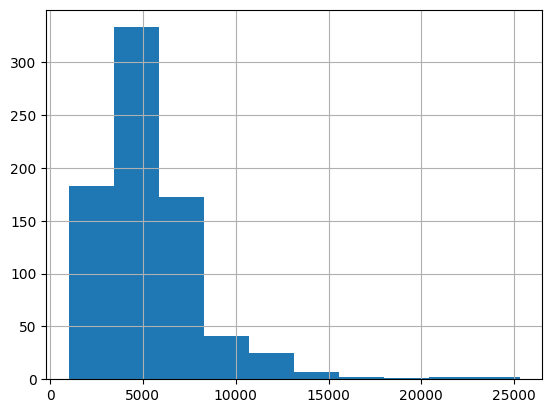

In [36]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our dataframe
df['num_words'] = df['opinion_text'].apply(get_words_per_doc)
df['num_words'].hist()

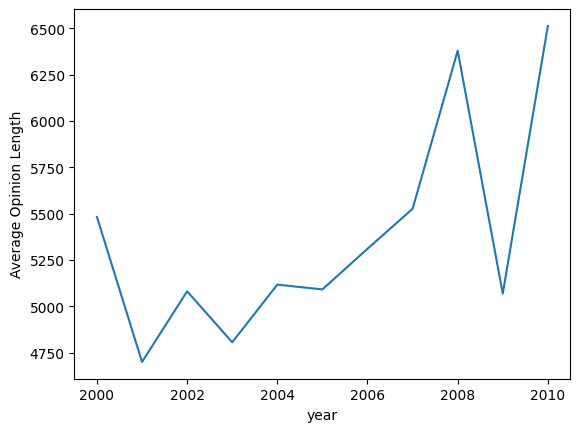

In [37]:
# plot length by year
ax = df.groupby('year')['num_words'].mean().plot()
ax.set_ylabel('Average Opinion Length')
import matplotlib.pyplot as plt
plt.show()

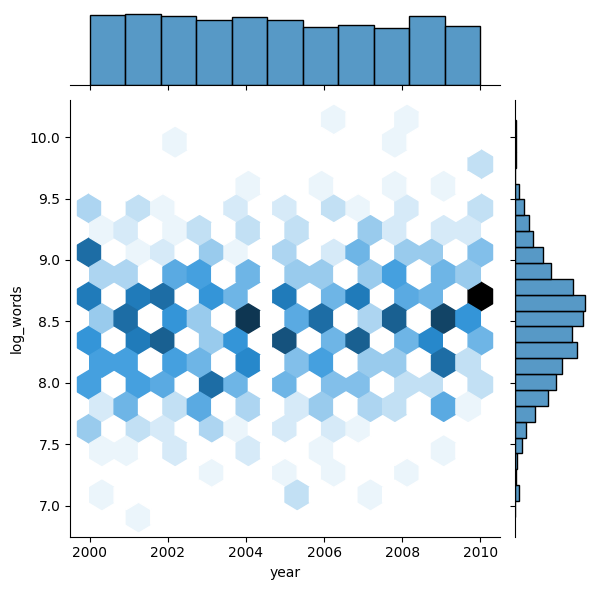

In [38]:
df['log_words'] = np.log(df['num_words'])
import seaborn as sns
sns.jointplot(data=df,x='year', y='log_words',kind='hex')

Build a frequency distribution over words with `Counter`.

In [39]:
from collections import Counter
freqs = Counter()
for i, row in df.iterrows():
    freqs.update(row['opinion_text'].lower().split())
    if i > 100:
        break
freqs.most_common()[:20] # can use most frequent words as style/function words

[('the', 34741),
 ('of', 17574),
 ('to', 13517),
 ('a', 9878),
 ('that', 9377),
 ('in', 9103),
 ('and', 8359),
 ('at', 5583),
 ('for', 4907),
 ('is', 4482),
 ('not', 3978),
 ('l.', 3517),
 ('ed.', 3496),
 ('as', 3323),
 ('or', 3185),
 ('s.', 3077),
 ('§', 3006),
 ('ct.', 2974),
 ('on', 2851),
 ('by', 2831)]

# Dictionary / Matching Methods

## Sentiment Analysis

In [40]:
# !pip install spacytextblob
# textblob sentiment analysis: https://github.com/sloria/TextBlob

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
print (spacy.__version__)

ModuleNotFoundError: No module named 'spacytextblob'

In [42]:
# Dictionary-Based Sentiment Analysis
nltk.download('vader_lexicon')

nlp = spacy.load('en_core_web_sm')
# spacy_text_blob = SpacyTextBlob()
# nlp.add_pipe('spacytextblob')
doc = nlp(df.iloc[0]["opinion_text"])
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sid = SentimentIntensityAnalyzer()
#polarity = sid.polarity_scores(text)
print("polarity", doc._.polarity) # sentimentintensityanalayzer nltk: {'neg': 0.134, 'neu': 0.785, 'pos': 0.081, 'compound': -0.9999}
print ("subjectivity", doc._.subjectivity)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aapo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


AttributeError: [E046] Can't retrieve unregistered extension attribute 'polarity'. Did you forget to call the `set_extension` method?

In [43]:
# sample 10% of the dataset
dfs = df.sample(frac=.1) 
# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    #return sid.polarity_scores(snippet)['compound']
    return nlp(snippet)._.polarity
dfs['sentiment'] = dfs['opinion_text'].apply(get_sentiment)

AttributeError: [E046] Can't retrieve unregistered extension attribute 'polarity'. Did you forget to call the `set_extension` method?

In [44]:
dfs.sort_values('sentiment',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

KeyError: 'sentiment'

In [42]:
# print beginning of most negative documents
[x[50:150] for x  in dfs[:5]['opinion_text']]

['\n\nThe False Claims Act (FCA) imposes civil liability on any person who knowingly uses a "false recor',
 ' \n\nWhen an alien is found ineligible to remain in the United States, the process for selecting the c',
 'he Court. \n\n Petitioner Josue Leocal, a Haitian citizen who is a lawful permanent resident of the Un',
 " \n\n Respondent Arturo Recuenco was convicted of assault in the second degree based on the jury's fin",
 'he Court. \n\n InTotten v. United States,92 U.S. 105, 23 L. Ed. 605 (1876), we held that public policy']

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# sample 20% of the dataset
dfs = df.sample(frac=.1) 

# apply compound sentiment score to data-frame
def get_sentiment(snippet):
    return sid.polarity_scores(snippet)['compound']
dfs['sentiment_vader'] = dfs['opinion_text'].apply(get_sentiment)
dfs.sort_values('sentiment_vader',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in dfs[-5:]['opinion_text']]

[' Court. \n\n  Under the Internal Revenue Code, individuals may subtract from their adjusted gross inco',
 't and delivered an opinion, in which Justice Souter, Justice Ginsburg, and Justice Breyer join. \n\n T',
 '.\n\nA citizen of Hawaii comes before us claiming that an explicit, race-based voting qualification ha',
 't and delivered the opinion of the Court with respect to Parts I, II, III, and VI, an opinion with r',
 't. \n\n  For private actions brought under 42 U.S.C. § 1983 and other specified measures designed to s']

## Sentiment Analysis with Huggingface 

In [ ]:
#!pip install transformers
#!pip install tensorflow

from tqdm import tqdm as tqdm
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")



Device set to use mps:0


In [51]:
# Classify a new sentence
sentence = "I love this product! It's amazing and works perfectly."
result = pipe(sentence)

# Print the result
print(result)

[{'label': 'Very Positive', 'score': 0.558630645275116}]


In [44]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/torchvision-0.2.0-py2.py3-none-any.whl (48 kB)
ERROR: Could not find a version that satisfies the requirement torchaudio (from versions: none)
ERROR: No matching distribution found for torchaudio


In [52]:
#!pip install torch

from torch.utils.data import Dataset
from tqdm.auto import tqdm

class OpinionDataset(Dataset):
    def __init__(self, df):
        super().__init__()
        self.df = df
    def __len__(self):
        return len(df)

    def __getitem__(self, i):
        return df.iloc[i]["opinion_text"][:512] # BERT max seq length


dataset = OpinionDataset(df)
sentiments = []

for out in tqdm(pipe(dataset, batch_size=16), total=len(dataset)):
        if out['label'] == "NEGATIVE":
            sentiments.append(-1*out['score'])
        else:
            sentiments.append(out['score'])

100%|██████████| 768/768 [00:05<00:00, 145.99it/s]


In [53]:
df['sentiments'] = sentiments

In [54]:
df.sort_values('sentiments',inplace=True)
# print beginning of most positive documents
[x[50:150] for x  in df[-5:]['opinion_text']]

["the Court and delivered an opinion, in which Justice O'Connor, Justice Scalia, and Justice Thomas jo",
 ' \n\n  A provision of the Age Discrimination in Employment Act of 1967 (ADEA), 81 Stat. 602, as amende',
 '\n\n\n\n In these cases, we decide whether § 525 of the Bankruptcy Code, 11 U.S.C. § 525, prohibits the ',
 'he Court.\n\nWe decide here whether employees of the State of Alabama may recover money damages by rea',
 '. \n\n This case presents a challenge to a statute enacted by Congress to protect minors from exposure']

In [55]:
# print beginning of most negative documents
[x[50:150] for x  in df[:5]['opinion_text']]

['\n\nRespondent-plaintiff in this case alleges that Government officials intentionally deceived her in ',
 '\n\nThe Government avoids reversal of a criminal conviction by showing that trial error, albeit raised',
 't.\n\nThis case concerns the obligation of prisoners who claim denial of their federal rights while in',
 't.\n\nThis litigation began when Ohio Cellular Products Corporation (OCP) sued respondent Adams USA, I',
 't. \n\n Out of respect for finality, comity, and the orderly administration of justice, a federal cour']

## StopWords

In [49]:
#from nltk.corpus import stopwords
#stopwords = set(stopwords.words('english'))
#stopwords
from spacy.lang.en import stop_words
print (stop_words.STOP_WORDS)

{'towards', 'throughout', 'latterly', 'amongst', 'alone', 'hers', "n't", 'did', '’re', 'along', 'again', 'mine', 'another', 'on', '’ve', 'enough', 'go', '‘re', 'only', 'should', 'to', 'yours', 'elsewhere', 'say', 'both', 'do', 'which', 'unless', 'together', 'just', 'become', 'about', 'almost', 'bottom', 'someone', 'everywhere', 'could', 'moreover', 'others', 'using', 'no', '‘d', 'show', 'four', 'were', '’d', 'being', 'various', 'hence', 'up', 'therefore', 'such', 'through', 'afterwards', 'somehow', 'himself', 'somewhere', 'seems', 'this', 'an', 'ever', 'former', 'once', 'rather', 'cannot', 'neither', 'much', "'ve", 'full', 'behind', 'whenever', 'during', 'at', 'beforehand', 'give', 'none', 'fifteen', 'so', 'until', 'beside', 'most', 'is', 'latter', 'how', 'thence', 'there', 'however', 'her', 'am', 'or', 'eleven', 'against', 'third', 'less', 'one', 'name', 'several', 'three', 'further', 'anyhow', '‘ve', 'across', 'else', '’s', 'really', 'above', 'two', 'below', 'me', 'part', 'their', 'p

In [50]:
#stopfreq = np.sum([freqs[x] for x in stopwords])
#stopfreq # 174132 for NLTK stopwords
stopwords = stop_words.STOP_WORDS
stopfreq = np.sum([freqs[x] for x in stopwords])
stopfreq

211014

In [51]:
otherfreq = np.sum([freqs[x] for x in freqs if x not in stopwords])
otherfreq

336628

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [59]:
import re

docs = dfs[:5]['opinion_text']

# Extract words after justice.
for doc in docs:    
    print(re.findall(r'Justice \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Justice Thomas ']
[]
['Justice Scalia ', 'justice problem ']
['Justice Roberts ', 'Justice Breyer ', 'Justice Breyer ', 'Justice Breyer ', 'Justice Stevens ']
['Justice Scalia ']


In [49]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['Gen-Sets', 'Gen-Sets', 'Gen-Sets', 'Gen-Sets', 'Gen-Set', 'Gen-Set', 'Gen-Set', 'Gen-Set', 'Gen-Sets', 'Gen-Sets', 'Gen-Sets', 'Gen-Sets', 'all-purpose']
['Respondent-Appellant', 'country-selection', 'step-three', 'last-resort', 'removable-but', 'country-selection', 'K-S', 'two-sentence']
['Anti-Drug', 'Puente-Salazar', 'Puente-Salazar', 'Trinidad-Aquino', 'Bazan-Reyes', 'Chapa-Garza', 'Trinidad-Aquino', 'third-degree', 'Trinidad-Aquino', 'Bazan-Reyes', 'career-offender', 'Lucio-Lucio', 'Bazan-Reyes', 'Lucio-Lucio', 'DUI-causing', 'DUI-causing', 'DUI-causing']
['to-wit', 'harmless-error', 'state-law', 'harmless-error', 'harmless-error', 'self-representation', 'reasonable-doubt', 'harmless-error', 'harmless-error', 'jury-trial', 'harmless-error', 'harmless-error', 'guilty-beyond', 'a-reasonable', 'guilty-beyond', 'a-reasonable', 'harmless-error']
['self-styled', 'high-ranking', 'high-risk', 'third-party', 'subject-matter', 'breach-of', 'wrongful-death', 'investigation-related', 'case-

In [50]:
# extract citations
for i, doc in enumerate(docs):
    finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)
                     doc)            # string
    for m in finder: 
        print(i, m.span(),m.group()) # location (start,end) and matching string

0 (926, 938) 471 F.3d 610
0 (940, 953) 621 (CA6 2006
0 (5291, 5305) 2005 WL 713569
0 (5916, 5928) 471 F.3d 610
0 (6699, 6711) 380 F.3d 488
0 (6747, 6760) 544 U.S. 1032
0 (6912, 6924) 552 U.S. 989
0 (7094, 7106) 529 U.S. 420
0 (8587, 8599) 356 U.S. 590
0 (13045, 13057) 534 U.S. 438
0 (15424, 15436) 547 U.S. 451
0 (16823, 16835) 483 U.S. 107
1 (651, 663) 329 F.3d 630
1 (665, 678) 631 (CA8 2003
1 (2532, 2545) 540 U.S. 1176
1 (2872, 2886) 116 Stat. 2192
1 (7397, 7411) 110 Stat. 3009
1 (7412, 7423) 600 to 3009
1 (10181, 10193) 543 U.S. 335
1 (11774, 11785) 540 U.S. 20
1 (12282, 12294) 359 U.S. 385
1 (15124, 15136) 404 U.S. 336
1 (15237, 15249) 251 U.S. 210
1 (15334, 15346) 196 U.S. 207
1 (20420, 20432) 453 U.S. 280
1 (23358, 23370) 533 U.S. 678
1 (23451, 23463) 543 U.S. 371
1 (24342, 24353) 426 U.S. 67
1 (26326, 26339) 110 Stat 3009
1 (26600, 26612) 357 U.S. 185
1 (26987, 26998) 459 U.S. 21
1 (27307, 27318) 8 (1995). 8
1 (28208, 28220) 264 F.2d 926
1 (28271, 28283) 262 F.2d 471
1 (28446, 28

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/t2/gt0ty_0x2sx9fdjy8rxy2p0w0000gp/T/ipykernel_72329/3088990580.py:3: SyntaxWarning: invalid escape sequence '\d'
  finder = re.finditer('\d+ [^\s]+ \d+', # pattern to match ([^\s] means non-white-space)


In [60]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'



In [52]:
re.search(pattern1,'The White House tried to calm uncertainty in the markets.')

<re.Match object; span=(30, 41), match='uncertainty'>

In [53]:
re.search(pattern2,'The Congress tried to calm uncertainty in the economy.')

<re.Match object; span=(46, 53), match='economy'>

In [54]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.')

In [55]:
re.search(pattern3,'The Congress tried to calm uncertainty in the markets.', re.IGNORECASE)

<re.Match object; span=(4, 12), match='Congress'>

In [61]:
def indicates_uncertainty(doc):
    m1 = re.search(pattern1, doc, re.IGNORECASE)
    m2 = re.search(pattern2, doc, re.IGNORECASE)
    m3 = re.search(pattern3, doc, re.IGNORECASE)
    if m1 and m2 and m3:
        return True
    else:
        return False

In [58]:
indicates_uncertainty('The White House tried to calm uncertainty in the economy.')

NameError: name 're' is not defined

In [63]:
indicates_uncertainty('The White House tried to calm uncertainty in the markets.')

False

In [64]:
df['uncertainty'] = df['opinion_text'].apply(indicates_uncertainty)

In [65]:
df.uncertainty.mean()

0.057291666666666664

<Axes: xlabel='year'>

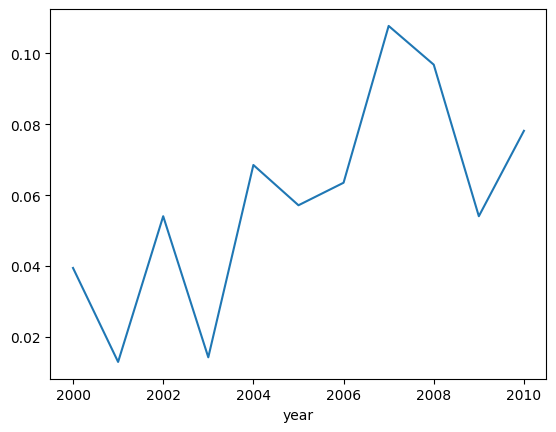

In [66]:
df.groupby('year')['uncertainty'].mean().plot()

## WordNet

These examples are based on the [NLTK tutorial](https://www.nltk.org/howto/wordnet.html).

In [68]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /Users/aapo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
wn.synsets('judge')

[Synset('judge.n.01'),
 Synset('evaluator.n.01'),
 Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [70]:
wn.synsets('judge', pos='v') # can filter on part of speech

[Synset('judge.v.01'),
 Synset('evaluate.v.02'),
 Synset('estimate.v.01'),
 Synset('pronounce.v.02'),
 Synset('judge.v.05')]

In [72]:
judge = wn.synset('judge.n.01')
judge

Synset('judge.n.01')

In [67]:
judge.definition()

'a public official authorized to decide questions brought before a court of justice'

In [73]:
wn.synset('estimate.v.01').examples()

['I estimate this chicken to weigh three pounds']

In [74]:
# categories to which "judge.n.01" belongs
judge.hypernyms()

[Synset('adjudicator.n.01'), Synset('official.n.01')]

In [70]:
# the root category of "judge.n.01"
judge.root_hypernyms()

[Synset('entity.n.01')]

In [71]:
wn.synset('estimate.v.01').root_hypernyms()

[Synset('think.v.03')]

In [72]:
# members of the "judge.n.01" category
judge.hyponyms()

[Synset('magistrate.n.01'),
 Synset('alcalde.n.01'),
 Synset('trial_judge.n.01'),
 Synset('daniel.n.02'),
 Synset('doge.n.01'),
 Synset('justiciar.n.01'),
 Synset('trier.n.01'),
 Synset('recorder.n.03'),
 Synset('praetor.n.01'),
 Synset('qadi.n.01'),
 Synset('ordinary.n.01'),
 Synset('chief_justice.n.01')]

In [75]:
# "holonym" is a part of a whole
juror = wn.synset('juror.n.01')
juror.member_holonyms()

[Synset('jury.n.01')]

In [76]:
# can find "lowest common hypernyms":
judge.lowest_common_hypernyms(juror)

[Synset('person.n.01')]

In [75]:
# "lemmas" are specific senses of a specific word.
judge.lemmas()

[Lemma('judge.n.01.judge'),
 Lemma('judge.n.01.justice'),
 Lemma('judge.n.01.jurist')]

In [76]:
[lemma.name() for lemma in judge.lemmas()]

['judge', 'justice', 'jurist']

In [77]:
# lemmas have additional properties
judge_lemma = judge.lemmas()[0]
judge_lemma.derivationally_related_forms()

[Lemma('judicial.s.01.judicial'),
 Lemma('judicial.a.02.judicial'),
 Lemma('judicial.a.03.judicial'),
 Lemma('judgeship.n.01.judgeship'),
 Lemma('judge.v.05.judge'),
 Lemma('judge.v.05.adjudicate'),
 Lemma('decide.v.02.adjudicate')]

In [81]:
good = wn.synset('good.a.01').lemmas()[0]
good.antonyms()

[Lemma('bad.a.01.bad')]

In [77]:
# verb frames summarize the different semantic contexts that a verb can be used
judge_verb = wn.synset('estimate.v.01').lemmas()[4]
judge_verb.frame_strings()

['Somebody judge something', 'Somebody judge PP', 'Somebody judge that CLAUSE']

In [78]:
# measure similarity in the dictionary between words
judge.path_similarity(wn.synset('juror.n.01'))

0.1111111111111111

In [79]:
judge.path_similarity(wn.synset('cat.n.01'))

0.08333333333333333

In [71]:
# Wu-Palmer similarity.
judge.wup_similarity(juror)

NameError: name 'judge' is not defined

In [86]:
judge.wup_similarity(wn.synset('cat.n.01'))

0.5217391304347826

In [87]:
# Can iterate over all synsets; e.g., all nouns:
for synset in list(wn.all_synsets('n')):
    if 'judg' in str(synset):
        print(synset)

Synset('judgeship.n.01')
Synset('judgment.n.02')
Synset('value_judgment.n.01')
Synset('judgment.n.03')
Synset('confession_of_judgment.n.01')
Synset('default_judgment.n.01')
Synset('final_judgment.n.01')
Synset('judgment_in_personam.n.01')
Synset('judgment_in_rem.n.01')
Synset('judgment_of_dismissal.n.01')
Synset('judgment_on_the_merits.n.01')
Synset('summary_judgment.n.01')
Synset('judgment.n.06')
Synset('judgment.n.04')
Synset('prejudgment.n.01')
Synset('judgment.n.01')
Synset('judges.n.01')
Synset('back_judge.n.01')
Synset('field_judge.n.01')
Synset('judge.n.01')
Synset('judge_advocate.n.02')
Synset('judge_advocate.n.01')
Synset('judge_advocate_general.n.01')
Synset('line_judge.n.01')
Synset('side_judge.n.01')
Synset('trial_judge.n.01')
Synset('judgment_lien.n.01')
Synset('judgment_day.n.01')


**Exercise**. Use wordnet to expand the set of words in the Baker-Bloom-Davis dictionary and re-compute policy uncertainty scores by year. 